In [1]:
import numpy as np
import zipfile as zp
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import csv

# hpi detrend to find boom and bust
output = pd.read_csv('../A_new-run/lti_is_2.325/Output-run1.csv',sep=';',skipinitialspace=True)

_50_years = output[3001:].reset_index()

hpi=_50_years[['Sale HPI']]
hpa = _50_years[['Sale AnnualHPA']]

hpi['Rental HPI'] = _50_years[['Rental HPI']]

hpi

/var/folders/wj/360bbnt54ns2j1m7zq0gkn3c0000gn/T/ipykernel_54187/2555154773.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hpi['Rental HPI'] = _50_years[['Rental HPI']]


,Sale HPI,Rental HPI
0,0.7251,1.0428
1,0.7318,1.0495
2,0.6865,1.0531
3,0.8158,1.0807
4,0.7661,1.0649
...,...,...
595,1.0935,1.0601
596,1.1011,1.0879
597,0.9070,1.0689
598,0.9070,1.0952


<AxesSubplot:>

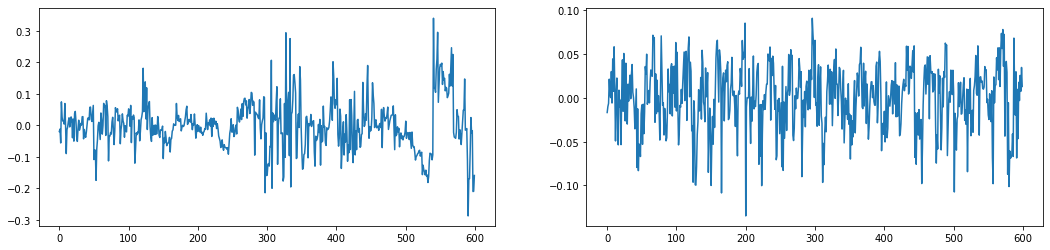

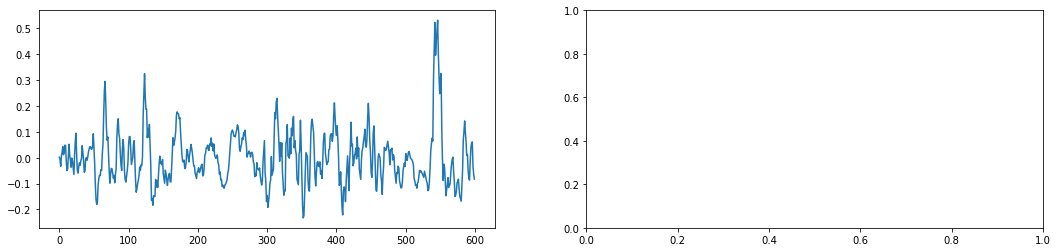

In [2]:
from statsmodels.tsa.filters.hp_filter import hpfilter
sale_cycle,sale_trend = hpfilter(hpi['Sale HPI'], lamb=129600)
rental_cycle,rental_trend = hpfilter(hpi['Rental HPI'], lamb=129600)
hpa_cycle, hpa_trend = hpfilter(hpa['Sale AnnualHPA'], lamb=129600)

fig, axes = plt.subplots(figsize=(18,4), nrows=1, ncols=2)
sale_cycle.plot(ax=axes[0])
rental_cycle.plot(ax=axes[1])

fig2, axes2 = plt.subplots(figsize=(18,4), nrows=1, ncols=2)
hpa_cycle.plot(ax=axes2[0])

<AxesSubplot:title={'center':'(a)'}>

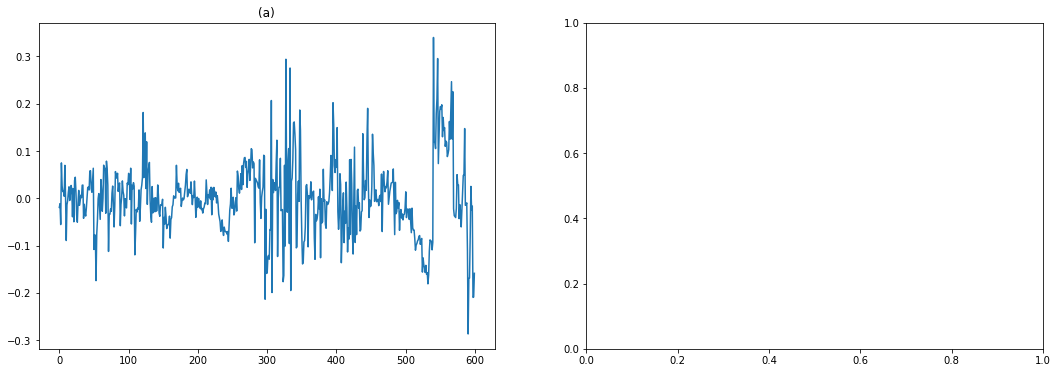

In [3]:
fig, axes = plt.subplots(figsize=(18,6), nrows=1, ncols=2)
sale_cycle.plot(ax=axes[0], title='(a)')

In [4]:
# find peaks
sale_cycle.sort_values(ascending=False)

540    0.340205
546    0.295590
327    0.294126
333    0.275623
566    0.246675
         ...   
307   -0.199425
598   -0.208914
597   -0.209748
297   -0.213616
590   -0.287107
Name: Sale HPI_cycle, Length: 600, dtype: float64

In [5]:
# maximum index=563
part1_ = sale_cycle.iloc[500:600]
part1_.sort_values(ascending=False)

540    0.340205
546    0.295590
566    0.246675
568    0.225316
545    0.210506
         ...   
591   -0.169501
532   -0.181078
598   -0.208914
597   -0.209748
590   -0.287107
Name: Sale HPI_cycle, Length: 100, dtype: float64

In [6]:
# bust period
part3_40 = sale_cycle.iloc[500:550]
part3_40.sort_values(ascending=True)

532   -0.181078
533   -0.162346
530   -0.160918
531   -0.157596
528   -0.156937
524   -0.156163
527   -0.146963
529   -0.141860
526   -0.140552
525   -0.126115
534   -0.111680
514   -0.109835
538   -0.109167
515   -0.098837
521   -0.097408
516   -0.095886
539   -0.093214
537   -0.090777
517   -0.090180
536   -0.089967
522   -0.089251
535   -0.088061
518   -0.087713
513   -0.085482
523   -0.085005
519   -0.080783
520   -0.078883
508   -0.072796
511   -0.067732
512   -0.067181
510   -0.062335
507   -0.047652
505   -0.044712
501   -0.040854
502   -0.029434
504   -0.024910
503   -0.022452
506   -0.022258
509   -0.020889
500    0.013591
547    0.073383
543    0.105200
542    0.118341
541    0.118616
548    0.132401
544    0.179016
549    0.183557
545    0.210506
546    0.295590
540    0.340205
Name: Sale HPI_cycle, dtype: float64

In [7]:
# read wealth csv and calculate inequality indicators
import math

raw_data40 = pd.DataFrame()

step = 0

with open('../A_new-run/lti_is_2.325/HousingWealth-run1.csv', 'r') as file:
    csvreader = csv.reader(file, delimiter=';')
    for row in csvreader:
       
        c_array=[]
        for i in range(0, len(row)):
            c_array.append(float(row[i]))
        
        c_array.sort(reverse=True)
        c_series = pd.Series(c_array)
        

        if (step == 0):
            raw_data40= pd.DataFrame(c_series)
        else:
            raw_data40 = pd.concat([raw_data40,c_series],axis=1)
        
        step +=1 

#outpath = 'output_simulation40_p80_p20.csv'
#raw_data40.to_csv(outpath,sep=';',index=False,header=True)
raw_data40

,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,5688883.21,4090068.79,3565688.75,3552991.59,3412701.22,3618624.42,3443078.16,2885697.59,3635432.77,3941244.67,...,2735223.82,3027235.25,2969127.52,3214361.94,4014069.25,5962117.79,6265723.42,5848973.93,5801269.21,4863331.00
1,3526277.50,2727974.53,2394101.81,2477335.74,2531733.96,2542440.06,2565897.82,2415892.90,2921429.15,2522539.17,...,1915254.54,2058837.60,2014655.94,2290289.37,2903367.36,4389642.16,4486255.42,4351188.32,4313210.69,3599615.49
2,2763807.58,2076040.12,1834401.60,1881553.59,1885180.47,2004920.08,2025057.71,1981657.50,2379861.83,2000803.37,...,1417731.22,1874416.57,1605189.93,1739414.72,1982252.73,3183060.93,3253015.43,3031436.35,3263388.52,2730263.44
3,2346062.63,1624421.48,1381135.02,1414959.65,1336449.96,1409303.43,1477060.34,1331202.56,1943386.50,1777064.03,...,1385653.71,1547261.41,1516070.80,1641178.49,1937642.72,3047650.05,3106395.50,2686453.58,2722988.17,2287385.14
4,2088938.69,1517259.62,1330587.22,1329312.19,1233950.32,1388939.37,1467311.07,1327105.70,1799718.64,1773383.70,...,1344500.16,1445090.43,1414701.95,1536390.11,1714986.66,2544156.69,2596017.02,2468220.02,2665046.00,2241868.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1021,0.00,-16443.44,-25511.73,-22267.53,-18607.57,-6996.15,-457.23,-5389.74,0.00,-6518.47,...,-6050.82,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-8911.01
1022,0.00,-18723.55,-27314.15,-22294.96,-19176.02,-8025.07,-915.40,-5571.68,-3966.14,-19151.66,...,-10805.28,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-11490.79
1023,0.00,-21516.32,-29129.59,-24384.40,-19453.57,-13292.95,-3592.17,-9123.66,-24390.05,-39230.71,...,-34727.81,0.00,-24805.30,-16220.33,0.00,0.00,0.00,-564.97,0.00,-11614.25
1024,NaN,NaN,NaN,NaN,NaN,NaN,-10301.80,-12630.59,NaN,NaN,...,NaN,-27636.48,NaN,NaN,NaN,NaN,NaN,-709.62,0.00,NaN


In [8]:
# p80 = 255345.91
# calculate top 10% /20% total wealth share

wealth_share_table40 = pd.DataFrame(columns=['10%total','10%share','20%total','20%share', '30%share'])

index_ = 0
for key,col in raw_data40.iteritems():
    filtered = col[col[:].notna()]
    len_ = len(filtered)
    # print(len(filtered))
    index_10 = round(len_ * 0.1)
    index_20 = round(len_ * 0.2)
    index_30 = round(len_ * 0.3)
    
    sum_ = filtered.sum()
    
    sum_10 = 0
    sum_20 = 0
    sum_30 = 0
    
    for val in range(0,index_10):
        sum_10 += col[val]
        
    for val2 in range(0, index_20):
        sum_20 += col[val2]
    
    for val3 in range(0, index_30):
        sum_30 += col[val3]
    
    wealth_share_table40.loc[index_] = [sum_10,sum_10/sum_ * 100,sum_20,sum_20/sum_ * 100, sum_30/sum_ * 100]
     
    index_ +=1
    #print(key)
      
wealth_share_table40

,10%total,10%share,20%total,20%share,30%share
0,75867676.53,48.868683,1.083118e+08,69.766956,83.344353
1,55688360.20,49.873109,7.845440e+07,70.261809,84.068410
2,49770946.41,50.975011,7.014321e+07,71.840118,85.426796
3,50015842.94,50.944909,7.094849e+07,72.266389,85.763768
4,50423623.95,50.932474,7.158070e+07,72.303061,85.669479
...,...,...,...,...,...
213,95287931.56,50.066377,1.345753e+08,70.708801,84.129130
214,96881471.77,49.895537,1.377841e+08,70.961082,84.482861
215,89895288.57,49.764332,1.281431e+08,70.937613,84.553246
216,91451000.15,50.709751,1.299267e+08,72.044584,85.445710


In [9]:
fig_data40 = wealth_share_table40.iloc[168:218].reset_index()
fig_data40


,index,10%total,10%share,20%total,20%share,30%share
0,168,54649831.21,50.833068,7.817208e+07,72.712510,85.856591
1,169,56965614.99,49.714600,8.247167e+07,71.974054,85.417938
2,170,52120918.29,49.474486,7.534781e+07,71.522038,84.957411
3,171,53119976.75,48.569468,7.779511e+07,71.130814,84.592389
4,172,48317779.79,49.016153,7.077174e+07,71.794662,85.167795
5,173,46414420.80,48.733488,6.819690e+07,71.604314,85.201005
6,174,52065168.19,48.619044,7.625415e+07,71.206989,84.773018
7,175,47059214.88,48.245777,6.948676e+07,71.238816,84.684237
8,176,48730164.59,48.450911,7.184254e+07,71.430834,84.753039
9,177,46254777.32,48.786535,6.799304e+07,71.714645,84.886311


<AxesSubplot:>

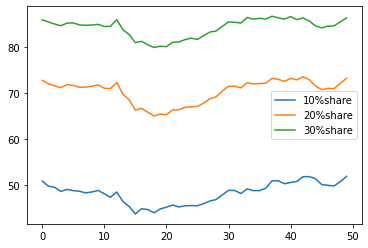

In [10]:

fig, ax = plt.subplots()
fig_data40[['10%share','20%share','30%share']][:].plot(ax=ax)

#plt.vlines(203, ymin=0,ymax=0.5,ls='--',color='red',label='booms')
#plt.vlines(311, ymin=0,ymax=0.5,ls='--',color='green',label='busts')
#plt.vlines(498, ymin=0,ymax=0.5,ls='--',color='green',label='busts')
#plt.vlines(167, ymin=0,ymax=0.5,ls='--',color='red',label='booms')
#plt.vlines(254, ymin=0,ymax=0.5,ls='--',color='red',label='booms')
#plt.vlines(350, ymin=0,ymax=0.5,ls='--',color='green',label='busts')
# plt.vlines(37, ymin=0,ymax=0.5,ls='--',color='yellow',label='stable')
#plt.show()

<AxesSubplot:title={'center':'Detrended cycles of (a)'}>

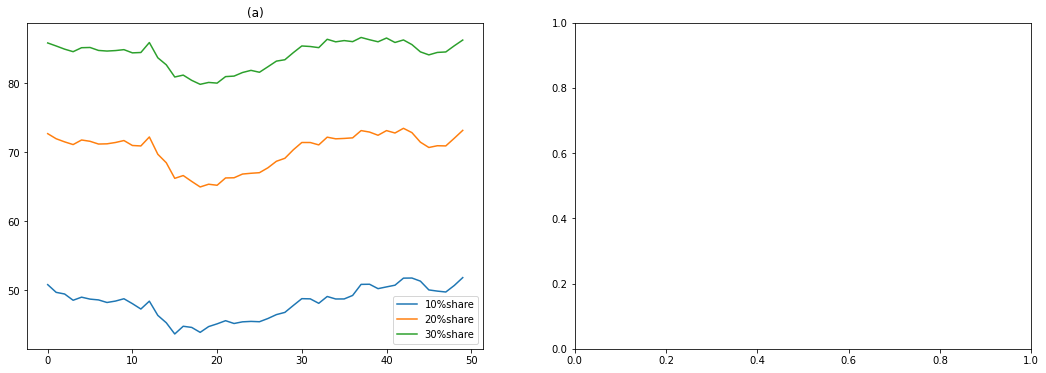

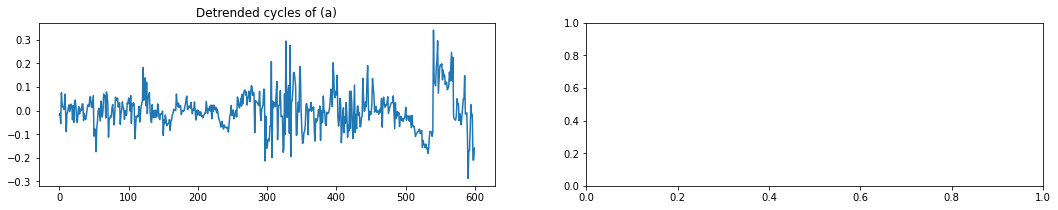

In [11]:
fig, axes = plt.subplots(figsize=(18,6), nrows=1, ncols=2)

fig_40 = wealth_share_table40.iloc[168:218].reset_index()
fig_40[['10%share','20%share','30%share']][:].plot(ax=axes[0],title='(a)')


fig2, axes2 = plt.subplots(figsize=(18,3), nrows=1, ncols=2)
sale_cycle.plot(ax=axes2[0], title='Detrended cycles of (a)')


In [12]:
# in boom episodes, rich people own less wealth than average
# in bust periods, rich people own more wealth than average


#bottom 10% 20% 30% wealth share

raw_inverse_40 = pd.DataFrame()

step = 0

with open('../A_new-run/lti_is_2.325/HousingWealth-run1.csv', 'r') as file:
    csvreader = csv.reader(file, delimiter=';')
    for row in csvreader:
        c_array=[]
        for i in range(0, len(row)):
            c_array.append(float(row[i]))
        
        c_array.sort()
        c_series = pd.Series(c_array)
        
        if (step == 0):
            raw_inverse_40= pd.DataFrame(c_series)
        else:
            raw_inverse_40 = pd.concat([raw_inverse_40,c_series],axis=1)
        
        step +=1 

wealth_inverse_40 = pd.DataFrame(columns=['10%total','10%share','20%total','20%share', '30%share'])

index_ = 0
for key,col in raw_inverse_40.iteritems():
    filtered = col[col[:].notna()]
    len_ = len(filtered)
    # print(len(filtered))
    index_10 = round(len_ * 0.1)
    index_20 = round(len_ * 0.2)
    index_30 = round(len_ * 0.3)
    
    sum_ = filtered.sum()
    
    sum_10 = 0
    sum_20 = 0
    sum_30 = 0
    
    for val in range(0,index_10):
        sum_10 += col[val]
        
    for val2 in range(0, index_20):
        sum_20 += col[val2]
    
    for val3 in range(0, index_30):
        sum_30 += col[val3]
    
    wealth_inverse_40.loc[index_] = [sum_10,sum_10/sum_ * 100,sum_20,sum_20/sum_ * 100, sum_30/sum_ * 100]
     
    index_ +=1
    #print(key)
      
# wealth_share_table40

fig_40 = wealth_inverse_40.iloc[168:218].reset_index()


In [13]:
fig_40

,index,10%total,10%share,20%total,20%share,30%share
0,168,-18319.10,-0.017040,-18319.10,-0.017040,-0.017040
1,169,0.00,0.000000,0.00,0.000000,0.000000
2,170,-722.76,-0.000686,-722.76,-0.000686,-0.000686
3,171,0.00,0.000000,0.00,0.000000,0.000000
4,172,0.00,0.000000,0.00,0.000000,0.000000
5,173,0.00,0.000000,0.00,0.000000,0.000000
6,174,0.00,0.000000,0.00,0.000000,0.000000
7,175,0.00,0.000000,0.00,0.000000,0.000000
8,176,0.00,0.000000,0.00,0.000000,0.000000
9,177,0.00,0.000000,0.00,0.000000,0.000000


<AxesSubplot:title={'center':'Detrended cycles of (a)'}>

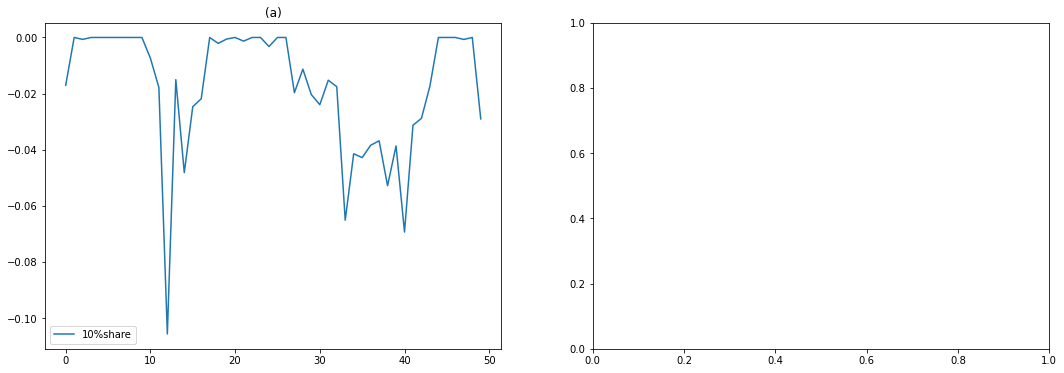

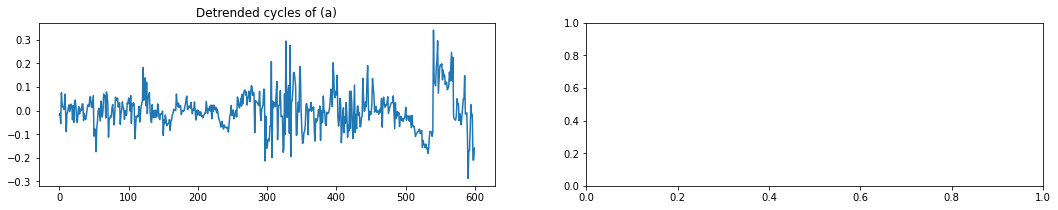

In [14]:
fig, axes = plt.subplots(figsize=(18,6), nrows=1, ncols=2)

fig_40 = wealth_inverse_40.iloc[168:218].reset_index()
fig_40[['10%share']][:].plot(ax=axes[0],title='(a)')

fig2, axes2 = plt.subplots(figsize=(18,3), nrows=1, ncols=2)
sale_cycle.plot(ax=axes2[0], title='Detrended cycles of (a)')

In [15]:
# 计算基尼系数，依然用于确认贫富差距程度

def gini(x):
    total = 0
    for i,xi in enumerate(x[:-1],1):
        total += np.sum(np.abs(xi - x[i:]))
        
    return total/(len(x)**2 * np.mean(x))


index_1 = 0


for key,col in raw_inverse_40.iteritems():
    filtered = col[col[:].notna()]
    gini_ = gini(filtered)
    # print(gini_)
    wealth_inverse_40.loc[[index_1],['Gini Coefficient']] = gini_
    index_1 +=1
    

outpath = 'right_lti_2.325_gini.csv'
wealth_inverse_40.to_csv(outpath,sep=';',index=False,header=True)

<AxesSubplot:title={'center':'Gini Coefficient of (a)'}>

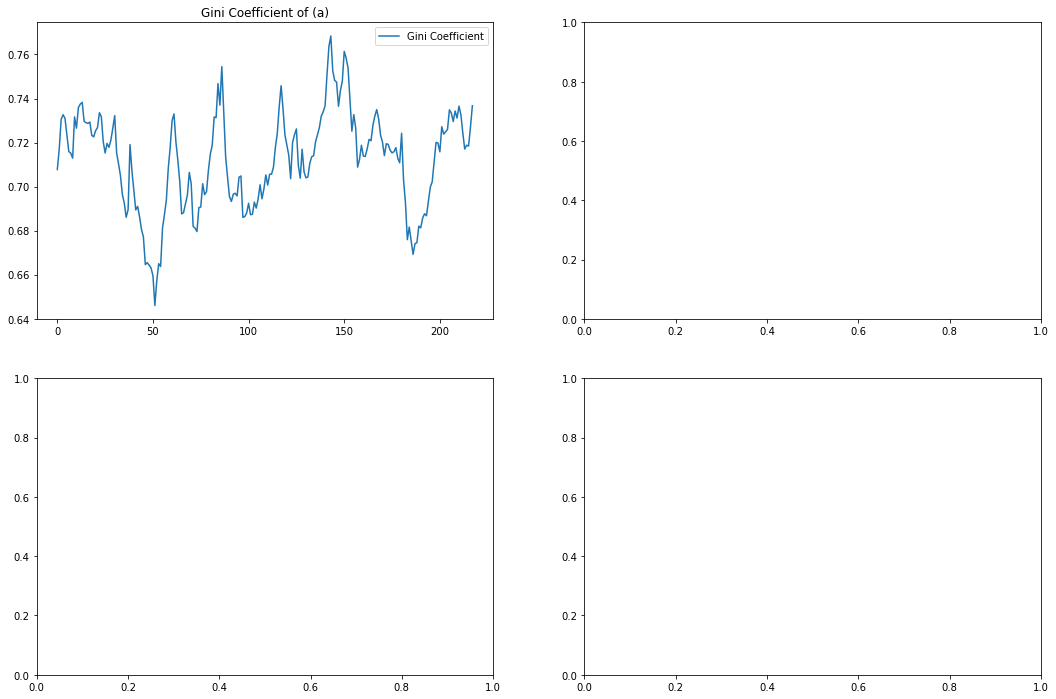

In [16]:
fig, axes = plt.subplots(figsize=(18,12), ncols=2, nrows=2)
wealth_inverse_40[['Gini Coefficient']][:].plot(ax=axes[0,0],title='Gini Coefficient of (a)')

In [17]:
wealth_inverse_40.iloc[168:218].reset_index()

,index,10%total,10%share,20%total,20%share,30%share,Gini Coefficient
0,168,-18319.10,-0.017040,-18319.10,-0.017040,-0.017040,0.730756
1,169,0.00,0.000000,0.00,0.000000,0.000000,0.723479
2,170,-722.76,-0.000686,-722.76,-0.000686,-0.000686,0.720203
3,171,0.00,0.000000,0.00,0.000000,0.000000,0.714084
4,172,0.00,0.000000,0.00,0.000000,0.000000,0.719468
5,173,0.00,0.000000,0.00,0.000000,0.000000,0.719178
6,174,0.00,0.000000,0.00,0.000000,0.000000,0.716578
7,175,0.00,0.000000,0.00,0.000000,0.000000,0.715340
8,176,0.00,0.000000,0.00,0.000000,0.000000,0.715839
9,177,0.00,0.000000,0.00,0.000000,0.000000,0.717714


In [18]:
wealth_inverse_40[:]['10%share'].mean()

-0.04179413778857817

In [19]:
# population occupation
# cut csv to get last 50 years' data
cut_40 = output.iloc[3001:3700].reset_index()
cut_40

composition_40 = pd.DataFrame(columns=['period','NonBTLOwnerOccupier','BTLOwnerOccupier', 'ActiveBTL', 'Renter', 'Homeless'])
averageOO = round(cut_40.loc[:]['nNonBTLOwnerOccupier'].mean())
averageBTLOO = round(cut_40.loc[:]['nBTLOwnerOccupier'].mean())
averageBTL = round(cut_40.loc[:]['nActiveBTL'].mean())
averageRenter = round(cut_40.loc[:]['nRenting'].mean())
averageHomeless = round(cut_40.loc[:]['nHomeless'].mean())
# averageBankrupt = cut_40.loc[:]['nBTLBankrupt'].mean() + cut_40.loc[:]['nNonBTLBankrupt'].mean()

composition_40.loc[0]=['average',averageOO,averageBTLOO, averageBTL,averageRenter,averageHomeless]


arr = [540]
for i in range(1,2):
    c_index = arr[i-1]
    OO = int(cut_40.loc[c_index]['nNonBTLOwnerOccupier'])
    BTLOO = int(cut_40.loc[c_index]['nBTLOwnerOccupier'])
    BTL = int(cut_40.loc[c_index]['nActiveBTL'])
    Renter = int(cut_40.loc[c_index]['nRenting'])
    Homeless = int(cut_40.loc[c_index]['nHomeless'])
    composition_40.loc[i]=['boom'+str(i),OO,BTLOO,BTL,Renter,Homeless]
    
arr = [532]
for i in range(1,2):
    c_index = arr[i-1]
    OO = int(cut_40.loc[c_index]['nNonBTLOwnerOccupier'])
    BTLOO = int(cut_40.loc[c_index]['nBTLOwnerOccupier'])
    BTL = int(cut_40.loc[c_index]['nActiveBTL'])
    Renter = int(cut_40.loc[c_index]['nRenting'])
    Homeless = int(cut_40.loc[c_index]['nHomeless'])
    composition_40.loc[i+3]=['bust'+str(i),OO,BTLOO,BTL,Renter,Homeless]
    
composition_40

,period,NonBTLOwnerOccupier,BTLOwnerOccupier,ActiveBTL,Renter,Homeless
0,average,451,42,71,259,201
1,boom1,435,38,80,261,209
4,bust1,432,39,80,270,202


<AxesSubplot:>

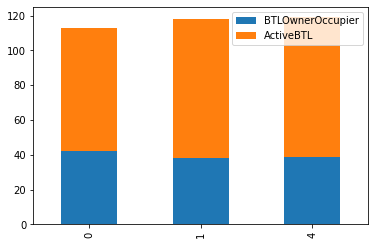

In [20]:
composition_40[['BTLOwnerOccupier','ActiveBTL']][:].plot.bar(stacked=True)

<AxesSubplot:>

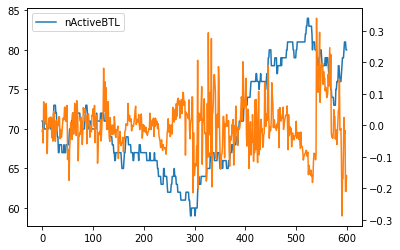

In [21]:
ax = cut_40[['nActiveBTL']][:].plot()
sale_cycle.plot(secondary_y=True, ax=ax)

<AxesSubplot:title={'center':'LTI Limit'}>

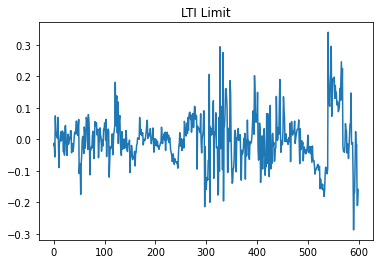

In [22]:
sale_cycle.plot(title='LTI Limit')

<AxesSubplot:>

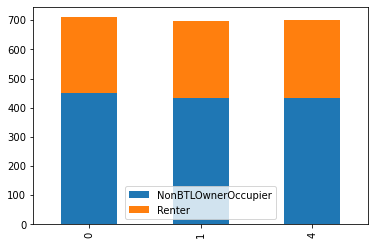

In [23]:
composition_40[['NonBTLOwnerOccupier','Renter']][:].plot.bar(stacked=True)

<AxesSubplot:title={'center':'(a)'}>

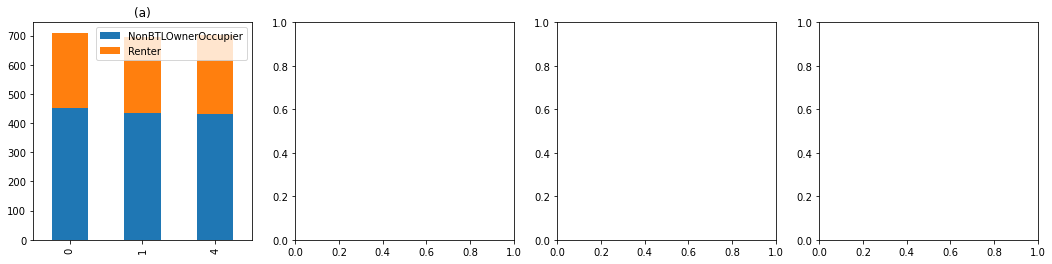

In [24]:
fig, axes = plt.subplots(figsize=(18,4), ncols=4, nrows=1)

composition_40[['NonBTLOwnerOccupier','Renter']][:].plot.bar(stacked=True, ax=axes[0],title='(a)')

<AxesSubplot:>

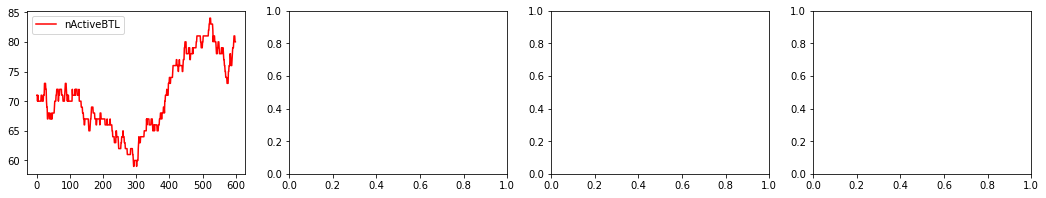

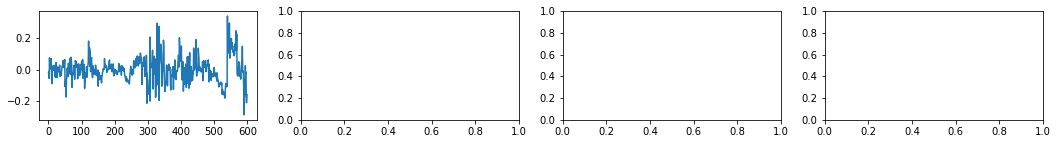

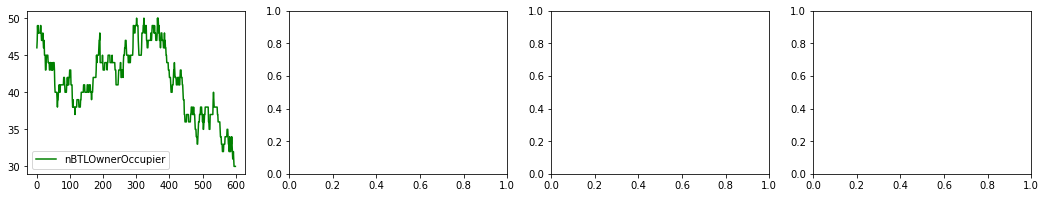

In [25]:
fig, axes = plt.subplots(figsize=(18,3), ncols=4, nrows=1)

cut_40[['nActiveBTL']][:].plot(ax=axes[0], color='red')

fig3, axes3 = plt.subplots(figsize=(18,2), ncols=4, nrows=1)
sale_cycle.plot(ax=axes3[0])

fig2, axes2 = plt.subplots(figsize=(18,3), ncols=4, nrows=1)

cut_40[['nBTLOwnerOccupier']][:].plot(ax=axes2[0],color='green')



<AxesSubplot:>

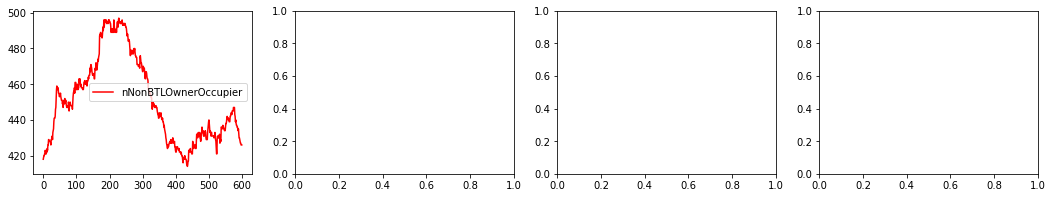

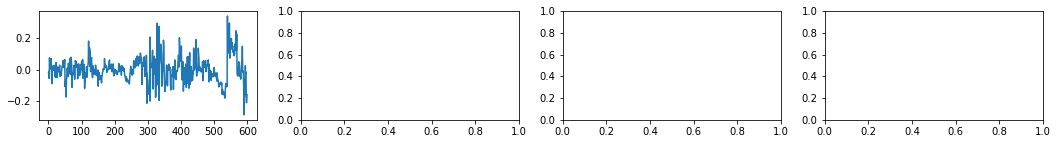

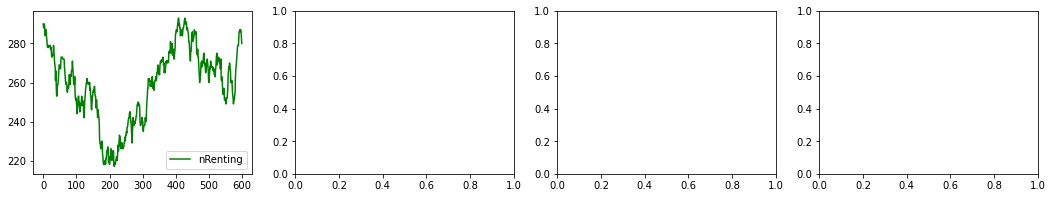

In [26]:
fig, axes = plt.subplots(figsize=(18,3), ncols=4, nrows=1)

cut_40[['nNonBTLOwnerOccupier']][:].plot(ax=axes[0], color='red')


fig3, axes3 = plt.subplots(figsize=(18,2), ncols=4, nrows=1)
sale_cycle.plot(ax=axes3[0])


fig2, axes2 = plt.subplots(figsize=(18,3), ncols=4, nrows=1)

cut_40[['nRenting']][:].plot(ax=axes2[0],color='green')

<AxesSubplot:xlabel='period'>

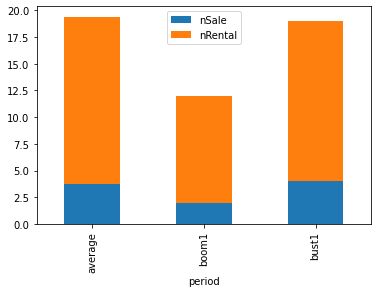

In [27]:
salerental_40 = pd.DataFrame(columns=['period','nSale','nRental'])
averageSales = cut_40.loc[:]['Sale nSales'].mean()
averageRent = cut_40.loc[:]['Rental nSales'].mean()

salerental_40.loc[0]=['average',averageSales,averageRent]


arr = [540]
for i in range(1,2):
    c_index = arr[i-1]
    OO = cut_40.loc[c_index]['Sale nSales']
    OOBTL = cut_40.loc[c_index]['Rental nSales']
    salerental_40.loc[i]=['boom'+str(i),OO,OOBTL]
    
arr = [532]
for i in range(1,2):
    c_index = arr[i-1]
    OO = cut_40.loc[c_index]['Sale nSales']
    OOBTL = cut_40.loc[c_index]['Rental nSales']
    salerental_40.loc[i+3]=['bust'+str(i),OO,OOBTL]
    
salerental_40.plot.bar(stacked=True, x='period')

<AxesSubplot:>

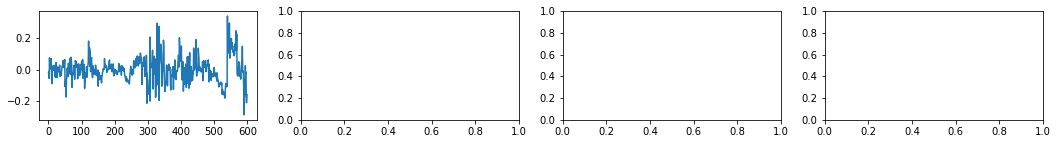

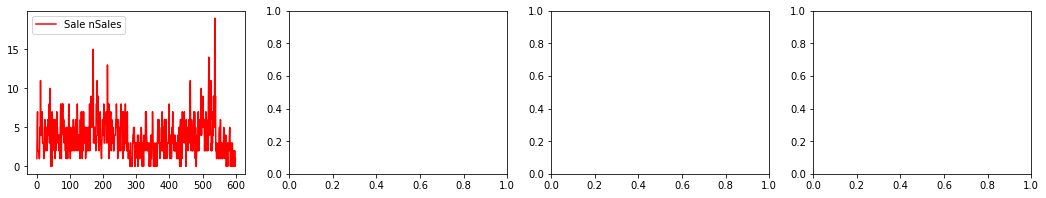

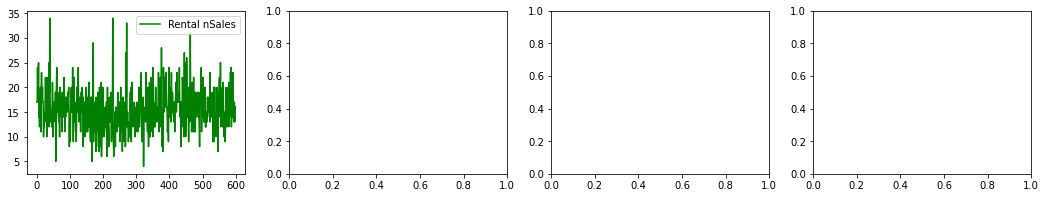

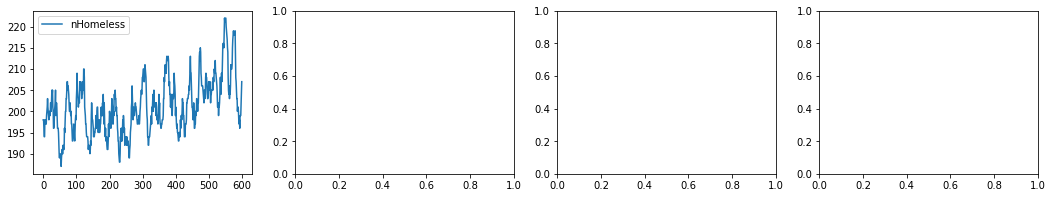

In [28]:
fig3, axes3 = plt.subplots(figsize=(18,2), ncols=4, nrows=1)
sale_cycle.plot(ax=axes3[0])


fig, axes = plt.subplots(figsize=(18,3), ncols=4, nrows=1)

cut_40[['Sale nSales']][:].plot(ax=axes[0], color='red')

fig2, axes2 = plt.subplots(figsize=(18,3), ncols=4, nrows=1)

cut_40[['Rental nSales']][:].plot(ax=axes2[0],color='green')


fig4, axes4 = plt.subplots(figsize=(18,3), ncols=4, nrows=1)

cut_40[['nHomeless']][:].plot(ax=axes4[0])

In [30]:
# buy to let scale

saleTransaction40 = pd.read_csv('../A_new-run/lti_is_2.325/SaleTransactions-run1.csv',sep=';',skipinitialspace=True)

initial = np.zeros((3601,2))

btl_40 = pd.DataFrame(initial, columns=['loan', 'nonLoan'])

loan_btl40 = saleTransaction40[(saleTransaction40.buyerHasBTLGene == True) & 
                 (saleTransaction40.mortgagePrincipal != 0)]


c_modelTime = -1 
count = 0

for index,row in loan_btl40.iterrows():
    if (row['modelTime'] == c_modelTime):
        count +=1
    else: 

        if (c_modelTime != -1):
 
            btl_40.loc[[row['modelTime']],['loan']] = count

            count = 1
            c_modelTime = row['modelTime']
        else:
            c_modelTime = row['modelTime'] 
            count +=1
          

    
non_loan_btl40 = saleTransaction40[(saleTransaction40.buyerHasBTLGene == True) & 
                (saleTransaction40.mortgagePrincipal == 0)]

c_modelTime = -1  
count = 0

for index,row in non_loan_btl40.iterrows():
    if (row['modelTime'] == c_modelTime):
        count +=1
    else: 
        if (c_modelTime != -1):
            btl_40.loc[[row['modelTime']],['nonLoan']] = count

            count = 1
            c_modelTime = row['modelTime']
        else:
            c_modelTime = row['modelTime'] 
            count +=1


cut_btl40 = btl_40.iloc[3001:3601]

yearly_btl_loan40 = pd.DataFrame(np.zeros((50,2)), columns=['loan', 'nonLoan'])

monthly = 1
countloan = 0
countnonloan = 0
count = 0
for index,row in cut_btl40.iterrows():
    if (monthly % 12 == 0):
        countloan += row['loan']
        countnonloan += row['nonLoan']
        monthly +=1
        
        yearly_btl_loan40.loc[count] = [countloan, countnonloan]
        count +=1
        
        countloan = 0
        countnonloan = 0
        monthly = 1
    else:
        countloan += row['loan']
        countnonloan += row['nonLoan']
        monthly +=1
    
    
yearly_btl_loan40

,loan,nonLoan
0,7.0,8.0
1,6.0,11.0
2,8.0,6.0
3,6.0,5.0
4,3.0,9.0
5,11.0,7.0
6,10.0,15.0
7,4.0,8.0
8,10.0,5.0
9,7.0,6.0


In [32]:
# first time buyer 
initial = np.zeros((3601,2))

ftb_40 = pd.DataFrame(initial, columns=['loan', 'nonLoan'])

loan_ftb40 = saleTransaction40[(saleTransaction40.buyerHasBTLGene == False) & 
                (saleTransaction40.firstTimeBuyerMortgage == True) & (saleTransaction40.mortgagePrincipal != 0)]


c_modelTime = -1 
count = 0

for index,row in loan_ftb40.iterrows():
    if (row['modelTime'] == c_modelTime):
        count +=1
    else: 
        
        if (c_modelTime != -1):
            
            ftb_40.loc[[row['modelTime']],['loan']] = count
            
            count = 1
            c_modelTime = row['modelTime']
        else:
            c_modelTime = row['modelTime'] 
            count +=1
           
        
non_loan_ftb40 = saleTransaction40[(saleTransaction40.buyerHasBTLGene == False) & 
                (saleTransaction40.firstTimeBuyerMortgage == True) & (saleTransaction40.mortgagePrincipal == 0)]

c_modelTime = -1  
count = 0

for index,row in non_loan_ftb40.iterrows():
    if (row['modelTime'] == c_modelTime):
        count +=1
    else: 
        
        if (c_modelTime != -1):
            
            ftb_40.loc[[row['modelTime']],['nonLoan']] = count
            
            count = 1
            c_modelTime = row['modelTime']
        else:
            c_modelTime = row['modelTime']
            count +=1


cut_ftb40 = ftb_40.iloc[3001:3601]

yearly_ftb_loan40 = pd.DataFrame(np.zeros((50,2)), columns=['loan', 'nonLoan'])

monthly = 1
countloan = 0
countnonloan = 0
count = 0
for index,row in cut_ftb40.iterrows():
    if (monthly % 12 == 0):
        countloan += row['loan']
        countnonloan += row['nonLoan']
        monthly +=1
        
        yearly_ftb_loan40.loc[count] = [countloan, countnonloan]
        count +=1
        
        countloan = 0
        countnonloan = 0
        monthly = 1
    else:
        countloan += row['loan']
        countnonloan += row['nonLoan']
        monthly +=1
    
    
yearly_ftb_loan40

,loan,nonLoan
0,10.0,2.0
1,13.0,1.0
2,13.0,3.0
3,11.0,4.0
4,13.0,2.0
5,10.0,2.0
6,7.0,0.0
7,7.0,2.0
8,11.0,1.0
9,8.0,3.0


In [34]:
# home mover
initial = np.zeros((3601,2))

hm_40 = pd.DataFrame(initial, columns=['loan', 'nonLoan'])

loan_data40 = saleTransaction40[(saleTransaction40.buyerHasBTLGene == False) & 
                (saleTransaction40.firstTimeBuyerMortgage == False) & (saleTransaction40.mortgagePrincipal != 0)]

c_modelTime = -1  
count = 0

for index,row in loan_data40.iterrows():
    if (row['modelTime'] == c_modelTime):
        count +=1
    else: 
   
        if (c_modelTime != -1):
       
            hm_40.loc[[row['modelTime']],['loan']] = count
         
            count = 1
            c_modelTime = row['modelTime']
        else:
            c_modelTime = row['modelTime']
            count +=1
    
non_loan_data40 = saleTransaction40[(saleTransaction40.buyerHasBTLGene == False) & 
                (saleTransaction40.firstTimeBuyerMortgage == False) & (saleTransaction40.mortgagePrincipal == 0)]

c_modelTime = -1 
count = 0

for index,row in non_loan_data40.iterrows():
    if (row['modelTime'] == c_modelTime):
        count +=1
    else: 

        if (c_modelTime != -1):
         
            hm_40.loc[[row['modelTime']],['nonLoan']] = count
      
            count = 1
            c_modelTime = row['modelTime']
        else:
            c_modelTime = row['modelTime'] 
            count +=1


cut_loan40 = hm_40.iloc[3001:3601]

yearly_hm_loan40 = pd.DataFrame(np.zeros((50,2)), columns=['loan', 'nonLoan'])

monthly = 1
countloan = 0
countnonloan = 0
count = 0
for index,row in cut_loan40.iterrows():
    if (monthly % 12 == 0):
        countloan += row['loan']
        countnonloan += row['nonLoan']
        monthly +=1
        
        yearly_hm_loan40.loc[count] = [countloan, countnonloan]
        count +=1
        
        countloan = 0
        countnonloan = 0
        monthly = 1
    else:
        countloan += row['loan']
        countnonloan += row['nonLoan']
        monthly +=1
    
    
yearly_hm_loan40

,loan,nonLoan
0,1.0,9.0
1,7.0,15.0
2,6.0,15.0
3,8.0,18.0
4,4.0,12.0
5,8.0,12.0
6,14.0,22.0
7,5.0,12.0
8,4.0,11.0
9,5.0,20.0


<AxesSubplot:>

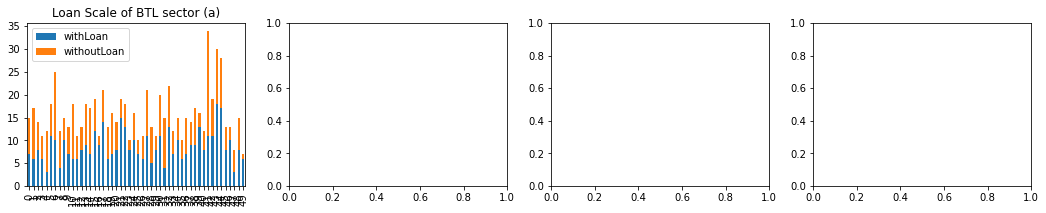

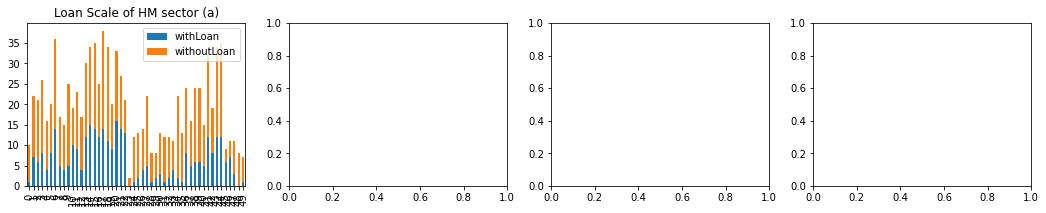

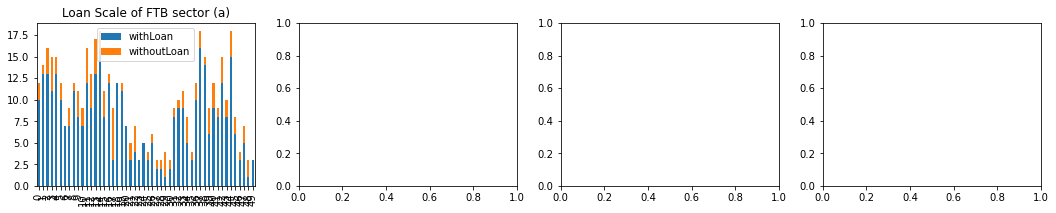

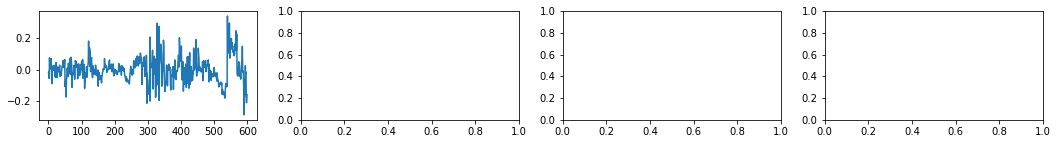

In [35]:
fig, axes = plt.subplots(figsize=(18,3), ncols=4, nrows=1)

yearly_btl_loan40.plot.bar(stacked=True, ax=axes[0], title='Loan Scale of BTL sector (a)')
axes[0].legend(['withLoan','withoutLoan'])

fig, axes4 = plt.subplots(figsize=(18,3), ncols=4, nrows=1)

yearly_hm_loan40.plot.bar(stacked=True, ax=axes4[0], title='Loan Scale of HM sector (a)')
axes4[0].legend(['withLoan','withoutLoan'])


fig2, axes2 = plt.subplots(figsize=(18,3), ncols=4, nrows=1)

yearly_ftb_loan40.plot.bar(stacked=True, ax=axes2[0], title='Loan Scale of FTB sector (a)')
axes2[0].legend(['withLoan','withoutLoan'])

fig3, axes3 = plt.subplots(figsize=(18,2), ncols=4, nrows=1)
sale_cycle.plot(ax=axes3[0])

In [36]:
yearly_hm_loan40[:]['nonLoan'].mean()

13.22

<AxesSubplot:>

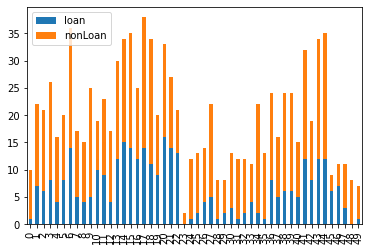

In [38]:
yearly_hm_loan40.plot.bar(stacked=True)

<AxesSubplot:>

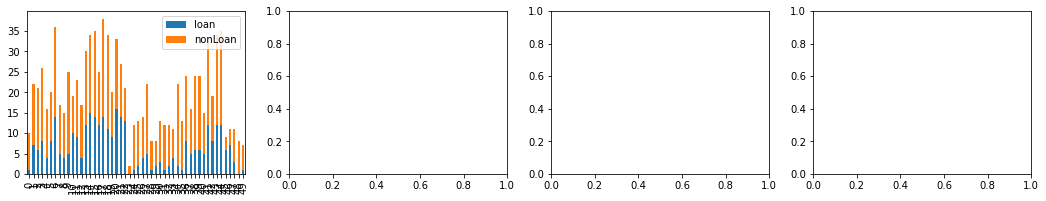

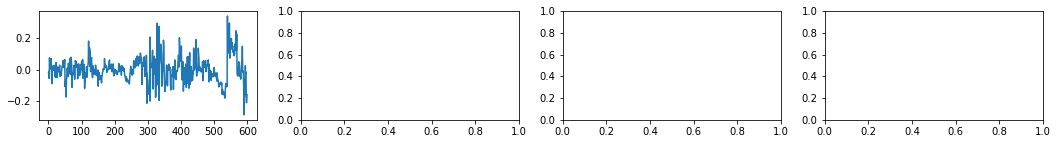

In [39]:
fig, axes = plt.subplots(figsize=(18,3), ncols=4, nrows=1)

yearly_hm_loan40.plot.bar(stacked=True, ax=axes[0])

fig3, axes3 = plt.subplots(figsize=(18,2), ncols=4, nrows=1)
sale_cycle.plot(ax=axes3[0])

In [40]:
yearly_ftb_loan40[:]['nonLoan'].mean()

1.9

In [41]:
yearly_btl_loan40[:]['nonLoan'].mean()

7.02

In [42]:
sectors_40 = pd.DataFrame(np.zeros((50,3)),columns=['BTL','HM','FTB'])
for i in range(0,50):
    nbtl = yearly_btl_loan40.loc[i]['loan'] + yearly_btl_loan40.loc[i]['nonLoan']
    nhm = yearly_hm_loan40.loc[i]['loan'] + yearly_hm_loan40.loc[i]['nonLoan']
    nftb = yearly_ftb_loan40.loc[i]['loan'] + yearly_ftb_loan40.loc[i]['nonLoan']
    sectors_40.loc[i] = [nbtl,nhm,nftb]
    
sectors_40

,BTL,HM,FTB
0,15.0,10.0,12.0
1,17.0,22.0,14.0
2,14.0,21.0,16.0
3,11.0,26.0,15.0
4,12.0,16.0,15.0
5,18.0,20.0,12.0
6,25.0,36.0,7.0
7,12.0,17.0,9.0
8,15.0,15.0,12.0
9,13.0,25.0,11.0


<AxesSubplot:>

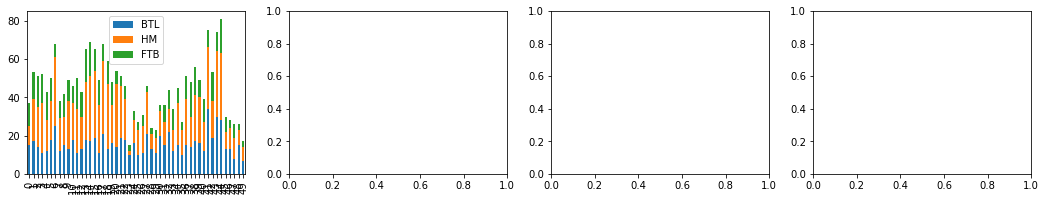

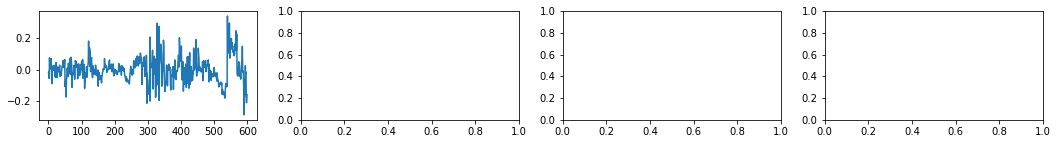

In [43]:
fig, axes = plt.subplots(figsize=(18,3), ncols=4, nrows=1)

sectors_40.plot.bar(stacked=True, ax=axes[0])

fig3, axes3 = plt.subplots(figsize=(18,2), ncols=4, nrows=1)
sale_cycle.plot(ax=axes3[0])

<AxesSubplot:>

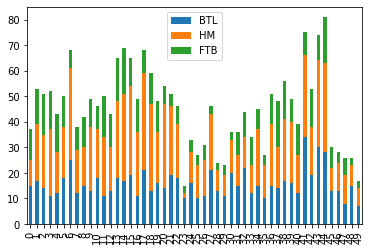

In [44]:
sectors_40.plot.bar(stacked=True)

In [45]:
sectors_40

,BTL,HM,FTB
0,15.0,10.0,12.0
1,17.0,22.0,14.0
2,14.0,21.0,16.0
3,11.0,26.0,15.0
4,12.0,16.0,15.0
5,18.0,20.0,12.0
6,25.0,36.0,7.0
7,12.0,17.0,9.0
8,15.0,15.0,12.0
9,13.0,25.0,11.0


In [46]:
# home mover
mortgage_hm40 = pd.DataFrame(np.zeros((3601,3)), columns=['nMortgages', 'mortgageSum', 'averageMortgage'])


loan_hm40 = saleTransaction40[(saleTransaction40.buyerHasBTLGene == False) & 
                (saleTransaction40.firstTimeBuyerMortgage == False) & (saleTransaction40.mortgagePrincipal != 0)]

loan_hm40


c_modelTime = -1
sum_ = 0

for index,row in loan_hm40.iterrows():
    if (row['modelTime'] == c_modelTime):
        sum_ += row['mortgagePrincipal']
    else: 
        if (c_modelTime != -1):
            mortgage_hm40.loc[[row['modelTime']],['mortgageSum']] = sum_
            
            sum_ = 0
            c_modelTime = row['modelTime']
        else:
            c_modelTime = row['modelTime']
            sum_ += row['mortgagePrincipal']


cut_loan_hm40 = mortgage_hm40.iloc[3001:3601]
    
cut_loan_hm40

,nMortgages,mortgageSum,averageMortgage
3001,0.0,0.0,0.0
3002,0.0,0.0,0.0
3003,0.0,0.0,0.0
3004,0.0,0.0,0.0
3005,0.0,0.0,0.0
...,...,...,...
3596,0.0,0.0,0.0
3597,0.0,0.0,0.0
3598,0.0,0.0,0.0
3599,0.0,0.0,0.0


In [47]:
for i in range(0, 600):
    n = cut_loan40.loc[i + 3001]['loan']
    cut_loan_hm40.loc[i + 3001]['nMortgages'] = n
    cut_loan_hm40.loc[i + 3001]['averageMortgage'] = cut_loan_hm40.loc[i + 3001]['mortgageSum'] / n
    
cut_loan_hm40

/var/folders/wj/360bbnt54ns2j1m7zq0gkn3c0000gn/T/ipykernel_54187/556524968.py:4: RuntimeWarning: invalid value encountered in double_scalars
  cut_loan_hm40.loc[i + 3001]['averageMortgage'] = cut_loan_hm40.loc[i + 3001]['mortgageSum'] / n


,nMortgages,mortgageSum,averageMortgage
3001,0.0,0.0,NaN
3002,0.0,0.0,NaN
3003,0.0,0.0,NaN
3004,0.0,0.0,NaN
3005,0.0,0.0,NaN
...,...,...,...
3596,0.0,0.0,NaN
3597,1.0,0.0,0.0
3598,0.0,0.0,NaN
3599,0.0,0.0,NaN


<AxesSubplot:>

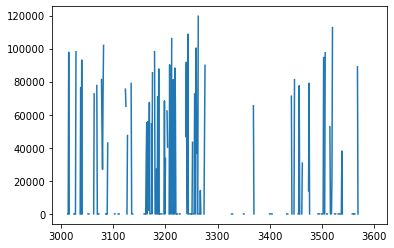

In [48]:
cut_loan_hm40.reset_index()
cut_loan_hm40[:]['averageMortgage'].plot()

In [49]:
# first time buyers

mortgage_ftb40 = pd.DataFrame(np.zeros((3601,3)), columns=['nMortgages', 'mortgageSum', 'averageMortgage'])


loan_ftb40 = saleTransaction40[(saleTransaction40.buyerHasBTLGene == False) & 
                (saleTransaction40.firstTimeBuyerMortgage == True) & (saleTransaction40.mortgagePrincipal != 0)]


c_modelTime = -1  
sum_ = 0

for index,row in loan_ftb40.iterrows():
    if (row['modelTime'] == c_modelTime):
        sum_ += row['mortgagePrincipal']
    else: 

        if (c_modelTime != -1):
  
            mortgage_ftb40.loc[[row['modelTime']],['mortgageSum']] = sum_
         
            sum_ = 0
            c_modelTime = row['modelTime']
        else:
            c_modelTime = row['modelTime'] 
            sum_ += row['mortgagePrincipal']


cut_loan_ftb40 = mortgage_ftb40.iloc[3001:3601]
    
for i in range(0, 600):
    n = ftb_40.loc[i + 3001]['loan']
    cut_loan_ftb40.loc[i + 3001]['nMortgages'] = n
    cut_loan_ftb40.loc[i + 3001]['averageMortgage'] = cut_loan_ftb40.loc[i + 3001]['mortgageSum'] / n
    

/var/folders/wj/360bbnt54ns2j1m7zq0gkn3c0000gn/T/ipykernel_54187/287866298.py:34: RuntimeWarning: invalid value encountered in double_scalars
  cut_loan_ftb40.loc[i + 3001]['averageMortgage'] = cut_loan_ftb40.loc[i + 3001]['mortgageSum'] / n


In [51]:
#  btl

mortgage_btl40 = pd.DataFrame(np.zeros((3601,3)), columns=['nMortgages', 'mortgageSum', 'averageMortgage'])


loan_btl40 = saleTransaction40[(saleTransaction40.buyerHasBTLGene == True) & 
                 (saleTransaction40.mortgagePrincipal != 0)]


c_modelTime = -1 
sum_ = 0

for index,row in loan_btl40.iterrows():
    if (row['modelTime'] == c_modelTime):
        sum_ += row['mortgagePrincipal']
    else: 
        if (c_modelTime != -1):
            mortgage_btl40.loc[[row['modelTime']],['mortgageSum']] = sum_
            sum_ = 0
            c_modelTime = row['modelTime']
        else:
            c_modelTime = row['modelTime'] 
            sum_ += row['mortgagePrincipal']


cut_loan_btl40 = mortgage_btl40.iloc[3001:3601]
    
for i in range(0, 600):
    n = btl_40.loc[i + 3001]['loan']
    cut_loan_btl40.loc[i + 3001]['nMortgages'] = n
    cut_loan_btl40.loc[i + 3001]['averageMortgage'] = cut_loan_btl40.loc[i + 3001]['mortgageSum'] / n
    
    

/var/folders/wj/360bbnt54ns2j1m7zq0gkn3c0000gn/T/ipykernel_54187/4051919812.py:31: RuntimeWarning: invalid value encountered in double_scalars
  cut_loan_btl40.loc[i + 3001]['averageMortgage'] = cut_loan_btl40.loc[i + 3001]['mortgageSum'] / n


In [53]:
names = locals()

mortgage_total40 = pd.DataFrame(np.zeros((600,3)), columns=['mortgageSum', 'mortgageNum', 'avergeSize'])

simulations = [40]

for j in range(0,1):
    
    for i in range(0,600):
        nSum = cut_loan_hm40.loc[i + 3001]['nMortgages'] + cut_loan_ftb40.loc[i + 3001]['nMortgages']+ cut_loan_btl40.loc[i + 3001]['nMortgages']
            
        nMoney = cut_loan_hm40.loc[i + 3001]['mortgageSum'] + cut_loan_ftb40.loc[i + 3001]['mortgageSum']+ cut_loan_btl40.loc[i + 3001]['mortgageSum']
            
        naverage = nMoney / nSum
        
        names['mortgage_total' + str(simulations[j])].loc[i] = [nMoney, nSum, naverage]

/var/folders/wj/360bbnt54ns2j1m7zq0gkn3c0000gn/T/ipykernel_54187/2362534114.py:14: RuntimeWarning: invalid value encountered in double_scalars
  naverage = nMoney / nSum


<AxesSubplot:>

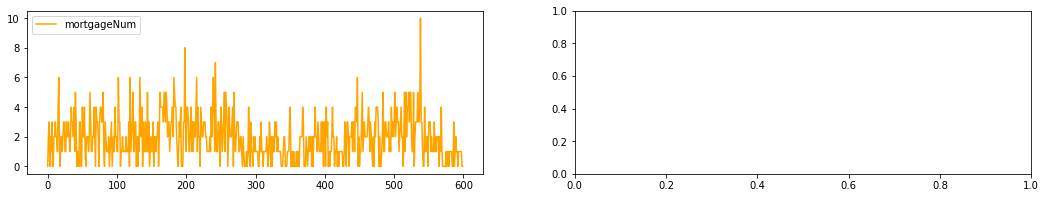

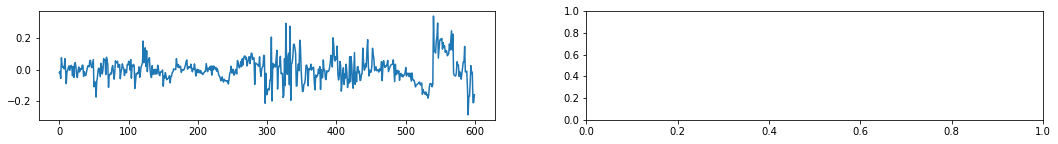

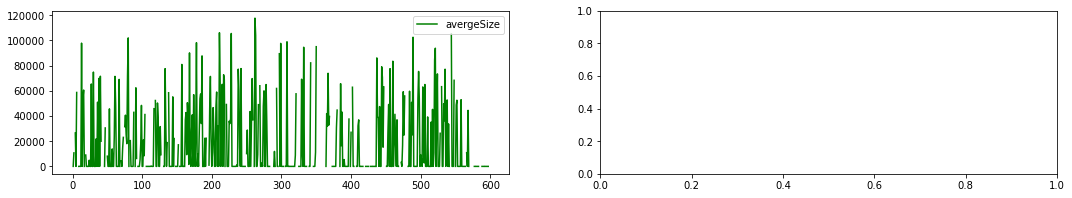

In [54]:
fig2, axes2 = plt.subplots(figsize=(18,3), ncols=2,nrows=1)

mortgage_total40[['mortgageNum']][:].plot(ax=axes2[0], color='orange')


#mortgage_total2[['avergeSize']][:].plot(ax=axes2[2],color='red')

#mortgage_total7[['avergeSize']][:].plot(ax=axes2[3],color='red')


fig3, axes3 = plt.subplots(figsize=(18,2), ncols=2, nrows=1)
sale_cycle.plot(ax=axes3[0])
#sale_cycle2.plot(ax=axes3[2])
#sale_cycle7.plot(ax=axes3[3])


fig, axes = plt.subplots(figsize=(18,3), ncols=2,nrows=1)

mortgage_total40[['avergeSize']][:].plot(ax=axes[0], color='green')


#mortgage_total2[['avergeSize']][:].plot(ax=axes[2],color='red')

#mortgage_total7[['avergeSize']][:].plot(ax=axes[3],color='red')



In [55]:


btlLTV = pd.DataFrame()

count = 0
with open('./LTI_SOFT/2023-08-16T04-19-11.779541Z/coreIndicator-btlLTV.csv', 'r') as file:
    csvreader = csv.reader(file, delimiter=';')
    for row in csvreader:
        #print(len(row))
        btlLTV[str(count)] = np.float_(row)
        count += 1
        #for i in range(0, len(row)):
            #btlLTV.loc[i]=float(row[i])

btlLTV

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,66.6217,67.2795,68.0241,64.3908,66.4557,65.1015,65.5215,68.1120,67.6382,66.9969,...,66.3988,66.1194,66.6919,64.2410,67.7565,68.5962,65.8800,65.8945,63.9004,66.3855
1,66.4521,67.2795,68.0241,64.3908,66.2837,65.1015,65.5215,68.1120,67.4682,66.8369,...,66.0771,66.1194,66.6919,64.2410,67.5869,68.5962,65.5588,65.7350,63.5803,66.3855
2,66.5922,67.1042,67.9261,64.4154,66.3368,65.0947,65.7311,68.2551,67.3416,66.9640,...,66.0871,66.1309,66.5939,64.3282,67.4883,68.6662,65.6330,65.4045,63.6939,66.0471
3,66.3818,67.1295,67.9634,64.4040,65.7658,65.0947,65.8038,68.2893,67.3881,66.9934,...,65.9859,66.0519,66.6310,64.3420,67.2646,68.6213,65.6905,65.4919,63.8128,65.9031
4,66.4644,67.1490,68.0077,64.4042,65.8001,65.0625,65.8344,68.3297,67.2858,67.0831,...,65.9654,66.0906,66.6178,64.3827,67.3403,68.6412,65.7457,65.4407,63.8545,65.7779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3596,56.3907,67.1366,52.6654,55.2994,59.3406,51.4841,44.1905,52.0944,56.4440,56.1126,...,58.8652,59.5698,55.5763,60.2489,58.6351,60.6330,49.3448,55.2174,58.4284,63.6621
3597,60.4447,65.3108,59.4400,55.8833,57.2843,52.6139,45.0333,51.8148,55.4438,56.1009,...,60.8872,61.6196,54.3844,59.7696,59.6731,60.5685,50.5003,53.8363,57.9637,61.6684
3598,60.1819,65.7419,60.4334,57.6977,55.1839,55.9030,44.6872,54.8707,56.9837,52.8938,...,60.0477,62.8328,53.8348,60.6592,59.1697,58.6621,50.3733,55.2744,56.9293,61.3331
3599,59.1736,60.7548,58.4819,59.0059,56.9510,51.4530,44.5704,55.7290,61.9349,53.9433,...,60.0598,55.4549,52.3195,61.4507,58.0164,54.1194,53.8932,56.6868,51.9260,62.7050


In [56]:
cut_btlLTV = btlLTV.iloc[3001:3601].reset_index()

cut_btlLTV

,index,0,1,2,3,4,5,6,7,8,...,40,41,42,43,44,45,46,47,48,49
0,3001,60.7441,57.8337,51.5474,59.7912,50.8821,54.0323,61.0048,53.0757,57.5207,...,56.3856,59.1340,61.3691,59.1286,57.5819,52.1261,52.3193,45.1391,54.4903,57.8829
1,3002,60.9240,60.5260,56.5734,60.0647,52.0971,58.4252,59.5940,53.3510,56.2419,...,54.4803,60.6553,60.8512,60.9743,55.2954,53.8351,50.3872,43.7834,50.6699,61.5612
2,3003,61.9219,60.3008,59.1884,62.1875,52.0069,54.5147,55.2209,55.5460,58.7333,...,56.5422,60.5983,58.1250,59.9459,55.8527,53.1097,47.8150,42.8873,46.5169,59.4571
3,3004,64.9150,58.1482,57.8695,61.9335,53.1660,54.6986,55.6273,55.0982,57.0144,...,53.6581,59.5743,62.6313,59.5437,56.0198,54.9119,47.2564,44.8328,48.8780,59.8881
4,3005,61.7083,58.8225,61.5007,63.5799,54.2083,52.1481,56.5879,54.3019,59.9663,...,56.9720,55.5859,60.3537,57.0540,53.2242,57.3699,48.7943,44.1157,48.3232,59.3767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,3596,56.3907,67.1366,52.6654,55.2994,59.3406,51.4841,44.1905,52.0944,56.4440,...,58.8652,59.5698,55.5763,60.2489,58.6351,60.6330,49.3448,55.2174,58.4284,63.6621
596,3597,60.4447,65.3108,59.4400,55.8833,57.2843,52.6139,45.0333,51.8148,55.4438,...,60.8872,61.6196,54.3844,59.7696,59.6731,60.5685,50.5003,53.8363,57.9637,61.6684
597,3598,60.1819,65.7419,60.4334,57.6977,55.1839,55.9030,44.6872,54.8707,56.9837,...,60.0477,62.8328,53.8348,60.6592,59.1697,58.6621,50.3733,55.2744,56.9293,61.3331
598,3599,59.1736,60.7548,58.4819,59.0059,56.9510,51.4530,44.5704,55.7290,61.9349,...,60.0598,55.4549,52.3195,61.4507,58.0164,54.1194,53.8932,56.6868,51.9260,62.7050


In [57]:
cut_btlLTV['40'][:].mean()

57.69553500000001

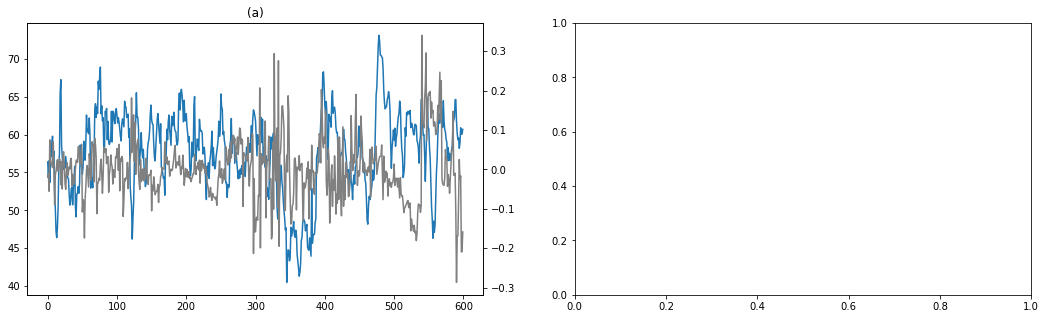

In [62]:
fig, axes = plt.subplots(figsize=(18,5), ncols=2,nrows=1)

cut_btlLTV[['40']][:].plot(ax=axes[0], title='(a)',legend=False, zorder=5)

ax1 = axes[0].twinx()
ax1.plot(range(0,600),sale_cycle, color='grey')


In [63]:
cut_btlLTV['40'][:]

0      56.3856
1      54.4803
2      56.5422
3      53.6581
4      56.9720
        ...   
595    58.8652
596    60.8872
597    60.0477
598    60.0598
599    60.6841
Name: 40, Length: 600, dtype: float64

In [64]:

ooLTV = pd.DataFrame()

count = 0
with open('./LTI_SOFT/2023-08-16T04-19-11.779541Z/coreIndicator-ooLTV.csv', 'r') as file:
    csvreader = csv.reader(file, delimiter=';')
    for row in csvreader:
        #print(len(row))
        ooLTV[str(count)] = np.float_(row)
        count += 1
        #for i in range(0, len(row)):
            #btlLTV.loc[i]=float(row[i])

ooLTV

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,77.4533,78.2858,78.8642,77.8959,79.9003,79.9552,79.3034,79.5264,81.1827,78.5684,...,79.1387,79.5615,80.2130,79.6902,77.9656,80.2150,79.7329,79.2964,79.6381,78.3550
1,77.1537,77.9795,78.4859,77.6200,79.6277,79.6009,78.9317,79.4902,80.7861,78.1805,...,78.8608,79.2372,79.8751,79.3339,77.7905,80.0362,79.6584,79.0697,79.2951,78.2492
2,76.4372,77.1046,77.4728,77.1133,78.8627,78.9204,78.1394,78.3980,80.1714,77.9141,...,78.3604,78.1893,79.1185,78.9146,77.3332,79.3550,79.0661,78.4495,78.4790,77.6775
3,76.2907,76.6314,77.1955,76.3079,78.5266,78.7025,77.8370,78.0578,79.4735,77.9363,...,78.0320,78.0617,78.8356,78.6097,76.8416,78.8576,78.5371,78.0730,77.9735,77.4925
4,76.0792,76.6628,77.0042,75.9914,78.3718,78.4233,78.1437,77.7685,79.5166,77.7845,...,77.9962,77.8606,78.7215,78.2360,76.4713,79.0034,78.5621,77.7931,78.2640,77.3182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3596,79.1279,87.0968,83.4934,83.3908,83.7355,83.2925,77.6495,83.2092,74.4937,88.9613,...,77.0763,74.8170,83.0512,80.4262,77.3267,78.9836,81.2826,82.4706,80.6571,81.1481
3597,77.9364,87.7775,83.8376,81.3226,82.9994,82.9010,77.0761,81.8620,68.1474,88.7806,...,76.3035,77.9535,82.5934,79.3091,78.7339,79.9130,81.5452,83.0322,79.6289,81.4560
3598,80.8672,85.6299,83.7064,82.5332,81.1834,82.9301,76.9764,82.5342,69.4132,88.6755,...,76.7530,77.5950,82.7331,79.4679,79.1253,78.9500,80.8344,81.4688,79.2999,81.0860
3599,87.3710,87.1482,83.3398,83.4645,80.9264,82.7141,74.4549,81.1519,71.1625,88.3877,...,78.3650,77.3352,82.8243,78.7528,79.6628,79.8531,81.5420,82.0020,79.2281,80.4042


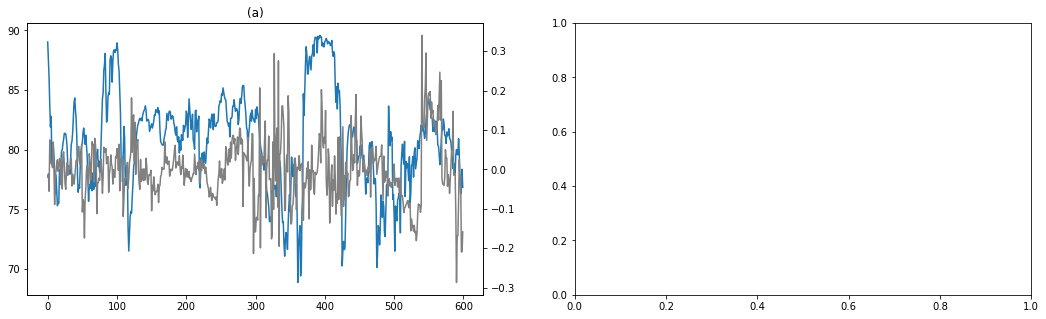

In [67]:
cut_ooLTV = ooLTV.iloc[3001:3601].reset_index()


fig, axes = plt.subplots(figsize=(18,5), ncols=2,nrows=1)

cut_ooLTV[['40']][:].plot(ax=axes[0], title='(a)',legend=False, zorder=5)

ax1 = axes[0].twinx()
ax1.plot(range(0,600),sale_cycle, color='grey')

In [68]:
cut_ooLTV['40'][350]

74.8227

<AxesSubplot:>

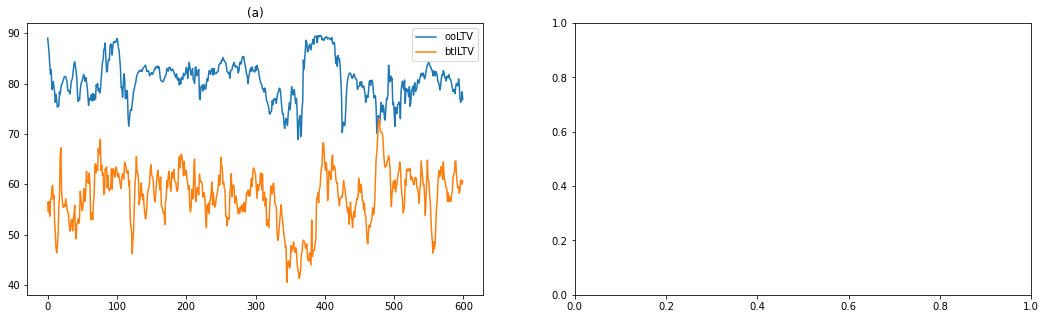

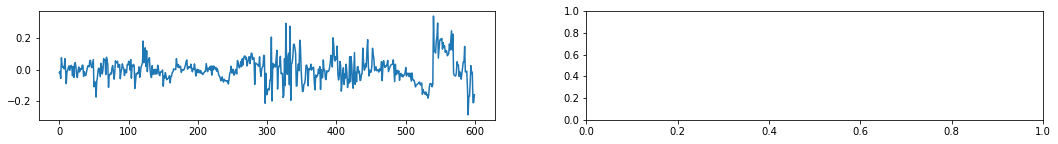

In [70]:
fig, axes = plt.subplots(figsize=(18,5), ncols=2,nrows=1)

cut_ooLTV[['40']][:].plot(ax=axes[0], title='(a)')
cut_btlLTV[['40']][:].plot(ax=axes[0])
axes[0].legend(['ooLTV', 'btlLTV'])


fig2, axes2 = plt.subplots(figsize=(18,2), ncols=2,nrows=1)
sale_cycle.plot(ax=axes2[0])


In [71]:

ooLTI = pd.DataFrame()

count = 0
with open('./LTI_SOFT/2023-08-16T04-19-11.779541Z/coreIndicator-ooLTI.csv', 'r') as file:
    csvreader = csv.reader(file, delimiter=';')
    for row in csvreader:
        #print(len(row))
        ooLTI[str(count)] = np.float_(row)
        count += 1
        #for i in range(0, len(row)):
            #btlLTV.loc[i]=float(row[i])


cut_ooLTI = ooLTI.iloc[3001:3601].reset_index()

In [72]:
cut_ooLTI['40'][350]

4.1226